## Notebook to apply the Implementation and plotting figures

### 1. Linear Regression with 1-D Output for Random Dataset

In [1]:
from config.config import Config, ModelConfig, RandomRegressionConfig, TrainingConfig, TrainingConfig, get_config
from main import train_and_evaluate


# config = get_config("random_regression_single_feature")
config = Config(
        dataset=RandomRegressionConfig(
            n_samples=1000,
            n_features=1,
            n_targets=1,
            noise=30,
            random_state=42,
            train_test_split=1,
        ),
        model=ModelConfig(name="linear", loss="mse"),
        training=TrainingConfig(
            epochs=300,
            lr=0.001,
            optimizer="adam",
            loss="mse",
        ),
)
model, dataset = train_and_evaluate(config)

100%|██████████| 300/300 [00:01<00:00, 220.44it/s]


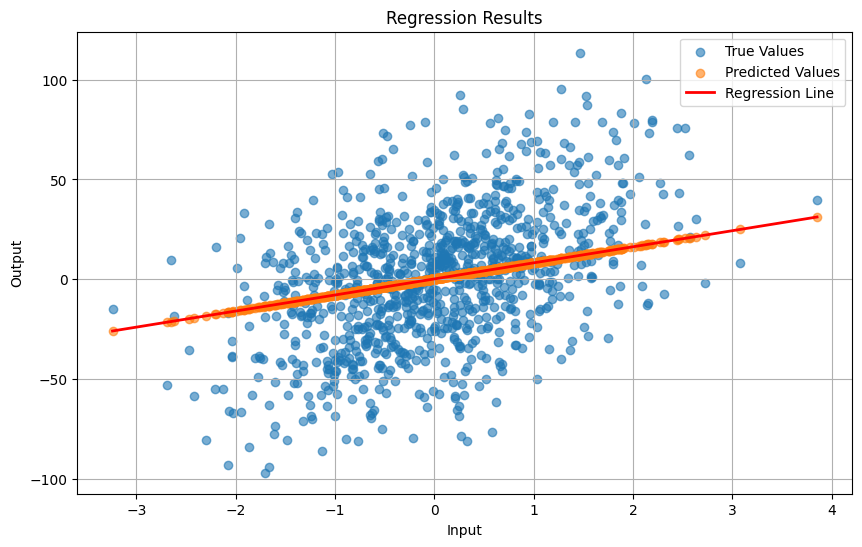

In [2]:
## Plot results
import torch
from models.models import predict
from utils.utils import PlotUtils
from torch.utils.data import DataLoader

test_data: DataLoader = dataset.test_train_to_dataloader()[0]

test_data = dataset.test_train_to_dataloader()[0]

# merge batches
test_data = [batch for batch in test_data]
# Extract inputs and targets from the test data
inputs = torch.vstack([data[0] for data in test_data])
targets = torch.vstack([data[1] for data in test_data])
predictions = predict(model, inputs)
PlotUtils.plot_regression_results(inputs, targets, predictions)

MSE (PyTorch): 949.0075073242188
MSE (sklearn): 882.16259765625
Distance between predictions: 258.5437927246094


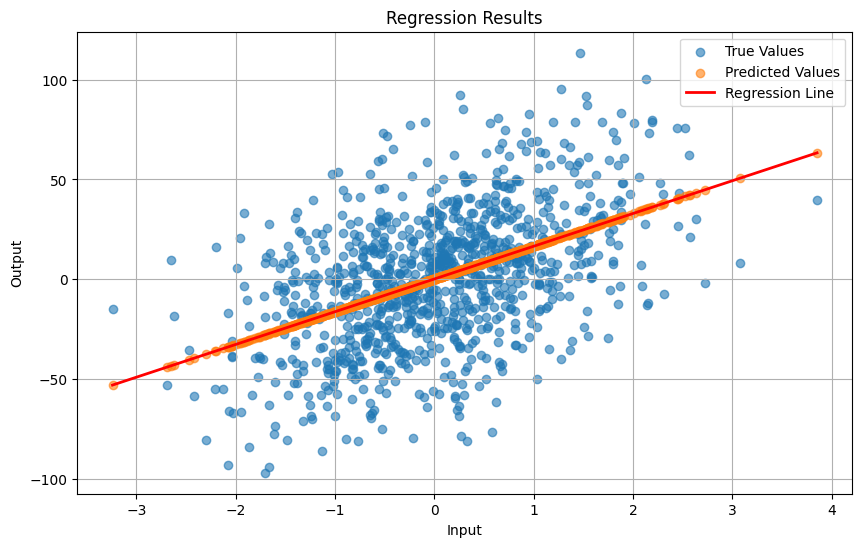

In [3]:
### Compare with sklearn

from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(inputs.numpy(), targets.numpy())
sk_predictions = sk_model.predict(inputs.numpy())


## Calculate MSE for both models
from sklearn.metrics import mean_squared_error
mse_torch = mean_squared_error(targets.numpy(), predictions.numpy())
mse_sklearn = mean_squared_error(targets.numpy(), sk_predictions)
print(f"MSE (PyTorch): {mse_torch}")
print(f"MSE (sklearn): {mse_sklearn}")

## So their distance should be very small
print(f"Distance between predictions: {torch.norm(predictions - torch.tensor(sk_predictions))}")

PlotUtils.plot_regression_results(inputs, targets, torch.tensor(sk_predictions))

## 2. Linear Regression on Energy Dataset

In [4]:
from config.config import LinearModelConfig, UCIDatasetConfig, get_config
from main import train_and_evaluate


# config = get_config("energy")
config = Config(
        dataset=UCIDatasetConfig(
            name="energy",
            train_test_split=1,
        ),
        model=LinearModelConfig(name="linear", loss="mse", hidden_dim=[]),
        training=TrainingConfig(
            epochs=200,
            lr=0.01,
            batch_size=768,
            optimizer="sgd",
            loss="mse",
        ),
    )
model, dataset = train_and_evaluate(config)

100%|██████████| 200/200 [00:00<00:00, 365.73it/s]


In [5]:
## Compare with sklearn

import torch
from models.models import predict
from torch.utils.data import DataLoader
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  
test_data: DataLoader = dataset.test_train_to_dataloader()[0]
test_data = dataset.test_train_to_dataloader()[0]
# merge batches
test_data = [batch for batch in test_data]
# Extract inputs and targets from the test data
inputs = torch.vstack([data[0] for data in test_data])
targets = torch.vstack([data[1] for data in test_data])
predictions = predict(model, inputs)



sk_model = LinearRegression()
sk_model.fit(inputs.numpy(), targets.numpy())
sk_predictions = sk_model.predict(inputs.numpy())



## Calculate MSE for both models
mse_torch = mean_squared_error(targets.numpy(), predictions.numpy())
mse_sklearn = mean_squared_error(targets.numpy(), sk_predictions)
print(f"MSE (PyTorch): {mse_torch}")
print(f"MSE (sklearn): {mse_sklearn}")

## So their distance should be very small
print(f"Distance between predictions: {torch.norm(predictions - torch.tensor(sk_predictions))}")


MSE (PyTorch): 0.09926576912403107
MSE (sklearn): 0.09799717366695404
Distance between predictions: 1.3958765268325806
